In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# train = pd.read_csv("/content/drive/MyDrive/코딩스터디 2주차 과제(22-1 클린업 패키지 2주차)/train.csv")
# test = pd.read_csv("/content/drive/MyDrive/코딩스터디 2주차 과제(22-1 클린업 패키지 2주차)/test.csv")

# train = pd.read_csv("/content/drive/MyDrive/겨울코딩스터디/코딩스터디2/train.csv")
# test = pd.read_csv("/content/drive/MyDrive/겨울코딩스터디/코딩스터디2/test.csv")

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# EDA

## 자료형확인

In [5]:
train

,id,date,store_nbr,family,sales,onpromotion
0,971190,2014-07-01,1,AUTOMOTIVE,2.000,0
1,971191,2014-07-01,1,BABY CARE,0.000,0
2,971192,2014-07-01,1,BEAUTY,6.000,0
3,971193,2014-07-01,1,BEVERAGES,1868.000,0
4,971194,2014-07-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
2029693,3000883,2017-08-15,9,POULTRY,438.133,0
2029694,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
2029695,3000885,2017-08-15,9,PRODUCE,2419.729,148
2029696,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029698 entries, 0 to 2029697
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 92.9+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


sales, onpromotion이 수치형, 나머지 변수는 다 범주형 변수라고 생각한다. date 는 범주형 중에서도 순서형 변수이다. 나머지 범주형 변수들은 전부 명목형 변수라고 생각한다.

## 데이터 병합

In [8]:
# holi = pd.read_csv("/content/drive/MyDrive/코딩스터디 2주차 과제(22-1 클린업 패키지 2주차)/holidays_events.csv")
# oil = pd.read_csv("/content/drive/MyDrive/코딩스터디 2주차 과제(22-1 클린업 패키지 2주차)/oil.csv")
# store = pd.read_csv("/content/drive/MyDrive/코딩스터디 2주차 과제(22-1 클린업 패키지 2주차)/stores.csv")

# holi = pd.read_csv("/content/drive/MyDrive/겨울코딩스터디/코딩스터디2/holidays_events.csv")
# oil = pd.read_csv("/content/drive/MyDrive/겨울코딩스터디/코딩스터디2/oil.csv")
# store = pd.read_csv("/content/drive/MyDrive/겨울코딩스터디/코딩스터디2/stores.csv")

holi = pd.read_csv("holidays_events.csv")
oil = pd.read_csv("oil.csv")
store = pd.read_csv("stores.csv")

In [9]:
holi

,date,type,locale,locale_name,description,transferred
0,2014-07-01,Event,National,Ecuador,Mundial de futbol Brasil: Octavos de Final,False
1,2014-07-03,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False
2,2014-07-03,Holiday,Local,Santo Domingo,Fundacion de Santo Domingo,False
3,2014-07-04,Event,National,Ecuador,Mundial de futbol Brasil: Cuartos de Final,False
4,2014-07-05,Event,National,Ecuador,Mundial de futbol Brasil: Cuartos de Final,False
...,...,...,...,...,...,...
228,2017-12-22,Additional,National,Ecuador,Navidad-3,False
229,2017-12-23,Additional,National,Ecuador,Navidad-2,False
230,2017-12-24,Additional,National,Ecuador,Navidad-1,False
231,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [10]:
holi = holi[holi['transferred']==False]
holi.rename(columns = {'type': 'holiday'}, inplace=True)
holi = holi[['date', 'holiday']]
#중복제거
holi.drop_duplicates(subset=['date', 'holiday'], inplace=True)
holi.drop_duplicates(subset=['date'], inplace=True)
holi

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,date,holiday
0,2014-07-01,Event
1,2014-07-03,Holiday
3,2014-07-04,Event
4,2014-07-05,Event
5,2014-07-08,Event
...,...,...
227,2017-12-22,Holiday
229,2017-12-23,Additional
230,2017-12-24,Additional
231,2017-12-25,Holiday


In [11]:
oil.head()

,date,dcoilwtico
0,2014-07-01,106.06
1,2014-07-02,105.18
2,2014-07-03,104.76
3,2014-07-04,NaN
4,2014-07-07,104.19


In [12]:
store.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [13]:
train = pd.merge(train, oil, how='left', on='date')
len(train)

2029698

In [14]:
train = pd.merge(train, store, how='left', on='store_nbr')
len(train)

2029698

In [15]:
train = pd.merge(train, holi, how='left', on='date')
len(train)

2029698

In [16]:
print('원본 test의 데이터 개수: ', len(test))
test = pd.merge(test, oil, how='left', on='date')
test = pd.merge(test, store, how='left', on='store_nbr')
test = pd.merge(test, holi, how='left', on='date')
len(test)

원본 test의 데이터 개수:  28512


28512

## 결측치 확인

In [ ]:
train.isnull().sum()

In [ ]:
test.isnull().sum()

In [ ]:
msno.matrix(train)

In [ ]:
msno.matrix(test)

시계열 데이터에서 결측치를 보간할 때 주의할 점
1. 시간의 순서를 잘 유지한다
2. 시간 간격을 일정하게 유지한다
3. 추세와 계절성 등을 고려한다

## 변수 시각화

In [ ]:
train.info()

In [ ]:
train.head()

수치형 변수: sales, onpromotion, dcoilwtico

범주형 변수: id, date, store_nbr, family, city, state, type, cluster, holiday

### 수치형

In [ ]:
df = train.copy()
num = ['sales', 'onpromotion', 'dcoilwtico']
df = df[num]
df.head()

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,10))

sns.boxplot(y=df['sales'], ax=axes[0])
sns.boxplot(y=df['onpromotion'], ax=axes[1])
sns.boxplot(y=df['dcoilwtico'], ax=axes[2])

plt.tight_layout()
plt.show()

sales와 onpromotion은 낮은 값에 데이터가 많이 밀집되어 있음을 확인할 수 있다. onpromotion은 이상치 분포가 비교적 큰 편이다. 

### 범주형

In [ ]:
df2 = train.copy()
cat=["id", "date", "store_nbr", "family", "city", "state", "type", "cluster", "holiday"]
df2 = df2[cat]
df2=df2.fillna("NA")
df2.head()

In [ ]:
fig, axes = plt.subplots(2,4, figsize=(25,10))

sns.countplot(data=df2, x=cat[2], ax=axes[0,0])
sns.countplot(data=df2, x=cat[3], ax=axes[0,1])
sns.countplot(data=df2, x=cat[4], ax=axes[0,2])
sns.countplot(data=df2, x=cat[5], ax=axes[0,3])
sns.countplot(data=df2, x=cat[6], ax=axes[1,0])
sns.countplot(data=df2, x=cat[7], ax=axes[1,1])
sns.countplot(data=df2, x=cat[8], ax=axes[1,2])

plt.tight_layout()
plt.show()

store_nbr과 family는 고르게 분포되어있다. city와 state의 경우 특정 값의 빈도가 높은 것으로 보인다. 대부분의 범주형 변수들이 다수의 범주(명목)를 갖고 있다. 위에서 확인한 것과 같이 holiday는 결측값이 많다.

## 결측치 보간

In [17]:
train

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,holiday
0,971190,2014-07-01,1,AUTOMOTIVE,2.000,0,106.06,Quito,Pichincha,D,13,Event
1,971191,2014-07-01,1,BABY CARE,0.000,0,106.06,Quito,Pichincha,D,13,Event
2,971192,2014-07-01,1,BEAUTY,6.000,0,106.06,Quito,Pichincha,D,13,Event
3,971193,2014-07-01,1,BEVERAGES,1868.000,0,106.06,Quito,Pichincha,D,13,Event
4,971194,2014-07-01,1,BOOKS,0.000,0,106.06,Quito,Pichincha,D,13,Event
...,...,...,...,...,...,...,...,...,...,...,...,...
2029693,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Quito,Pichincha,B,6,Holiday
2029694,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Quito,Pichincha,B,6,Holiday
2029695,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Quito,Pichincha,B,6,Holiday
2029696,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Quito,Pichincha,B,6,Holiday


In [18]:
df3 = train.copy()
df3 = df3[['date', 'dcoilwtico']]
df3.drop_duplicates(subset=['date', 'dcoilwtico'], inplace=True)
df3

,date,dcoilwtico
0,2014-07-01,106.06
1782,2014-07-02,105.18
3564,2014-07-03,104.76
5346,2014-07-04,NaN
7128,2014-07-05,NaN
...,...,...
2020788,2017-08-11,48.81
2022570,2017-08-12,NaN
2024352,2017-08-13,NaN
2026134,2017-08-14,47.59


In [19]:
df3.fillna(method = 'pad', inplace = True)
df3

,date,dcoilwtico
0,2014-07-01,106.06
1782,2014-07-02,105.18
3564,2014-07-03,104.76
5346,2014-07-04,104.76
7128,2014-07-05,104.76
...,...,...
2020788,2017-08-11,48.81
2022570,2017-08-12,48.81
2024352,2017-08-13,48.81
2026134,2017-08-14,47.59


In [20]:
train = train.drop('dcoilwtico',axis=1)
train = pd.merge(train, df3, how='left', on='date')
train = train.rename(columns={'dcoilwtico':'oil_price'})
train

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,holiday,oil_price
0,971190,2014-07-01,1,AUTOMOTIVE,2.000,0,Quito,Pichincha,D,13,Event,106.06
1,971191,2014-07-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,Event,106.06
2,971192,2014-07-01,1,BEAUTY,6.000,0,Quito,Pichincha,D,13,Event,106.06
3,971193,2014-07-01,1,BEVERAGES,1868.000,0,Quito,Pichincha,D,13,Event,106.06
4,971194,2014-07-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,Event,106.06
...,...,...,...,...,...,...,...,...,...,...,...,...
2029693,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,Holiday,47.57
2029694,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,Holiday,47.57
2029695,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,Holiday,47.57
2029696,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,Holiday,47.57


In [21]:
df4 = test.copy()
df4 = df4[['date', 'dcoilwtico']]
df4.drop_duplicates(subset=['date', 'dcoilwtico'], inplace=True)
df4

,date,dcoilwtico
0,2017-08-16,46.80
1782,2017-08-17,47.07
3564,2017-08-18,48.59
5346,2017-08-19,NaN
7128,2017-08-20,NaN
8910,2017-08-21,47.39
10692,2017-08-22,47.65
12474,2017-08-23,48.45
14256,2017-08-24,47.24
16038,2017-08-25,47.65


In [22]:
df4.fillna(method = 'pad', inplace = True)
df4

,date,dcoilwtico
0,2017-08-16,46.80
1782,2017-08-17,47.07
3564,2017-08-18,48.59
5346,2017-08-19,48.59
7128,2017-08-20,48.59
8910,2017-08-21,47.39
10692,2017-08-22,47.65
12474,2017-08-23,48.45
14256,2017-08-24,47.24
16038,2017-08-25,47.65


In [23]:
test = test.drop('dcoilwtico',axis=1)
test = pd.merge(test, df4, how='left', on='date')
test = test.rename(columns={'dcoilwtico':'oil_price'})

dcoilwtico에서 발생하는 결측치를 대체하기 위해, 시계열 데이터를 보간하는 방법 중 직전 날짜에 있는 데이터로 imputation 해주었다. 미래 시점의 값은 알 수 없기 때문에 mean imputation과 같은 방법을 이용해서는 안 되며 이에 과거의 값, 직전의 값으로 결측치를 대체하였다.

In [24]:
train['holiday']

0            Event
1            Event
2            Event
3            Event
4            Event
            ...   
2029693    Holiday
2029694    Holiday
2029695    Holiday
2029696    Holiday
2029697    Holiday
Name: holiday, Length: 2029698, dtype: object

In [25]:
train['holiday'] = train['holiday'].fillna(0)
train.loc[train['holiday'] != 0,'holiday'] = 1

In [26]:
test['holiday'] = test['holiday'].fillna(0)
test.loc[test['holiday'] != 0,'holiday'] = 1

holiday 변수에서 발생하는 결측치는 0으로, 이외의 값들에는 1을 대입해주었다. 여러 범주로 구분되어 있던 것을 휴일 여부(0,1)로 단순히 구분하기 위해서이다.

## 파생변수 생성

In [27]:
train['date_time']=pd.to_datetime(train['date'])

In [28]:
train['wday']=train['date_time'].dt.day
train['year']=train['date_time'].dt.year
train['month']=train['date_time'].dt.month
train = train.drop('date_time',axis=1)

In [29]:
train

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,holiday,oil_price,wday,year,month
0,971190,2014-07-01,1,AUTOMOTIVE,2.000,0,Quito,Pichincha,D,13,1,106.06,1,2014,7
1,971191,2014-07-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,1,106.06,1,2014,7
2,971192,2014-07-01,1,BEAUTY,6.000,0,Quito,Pichincha,D,13,1,106.06,1,2014,7
3,971193,2014-07-01,1,BEVERAGES,1868.000,0,Quito,Pichincha,D,13,1,106.06,1,2014,7
4,971194,2014-07-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,1,106.06,1,2014,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029693,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,1,47.57,15,2017,8
2029694,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,1,47.57,15,2017,8
2029695,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,1,47.57,15,2017,8
2029696,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,1,47.57,15,2017,8


In [30]:
train.duplicated().sum()

0

In [31]:
test['date_time']=pd.to_datetime(test['date'])
test['wday']=test['date_time'].dt.day
test['year']=test['date_time'].dt.year
test['month']=test['date_time'].dt.month
test = test.drop('date_time',axis=1)
test

,id,date,store_nbr,family,onpromotion,city,state,type,cluster,holiday,oil_price,wday,year,month
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,0,46.80,16,2017,8
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,0,46.80,16,2017,8
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,0,46.80,16,2017,8
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,0,46.80,16,2017,8
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,0,46.80,16,2017,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,Quito,Pichincha,B,6,0,47.26,31,2017,8
28508,3029396,2017-08-31,9,PREPARED FOODS,0,Quito,Pichincha,B,6,0,47.26,31,2017,8
28509,3029397,2017-08-31,9,PRODUCE,1,Quito,Pichincha,B,6,0,47.26,31,2017,8
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,Quito,Pichincha,B,6,0,47.26,31,2017,8


# Modeling

## time series cv

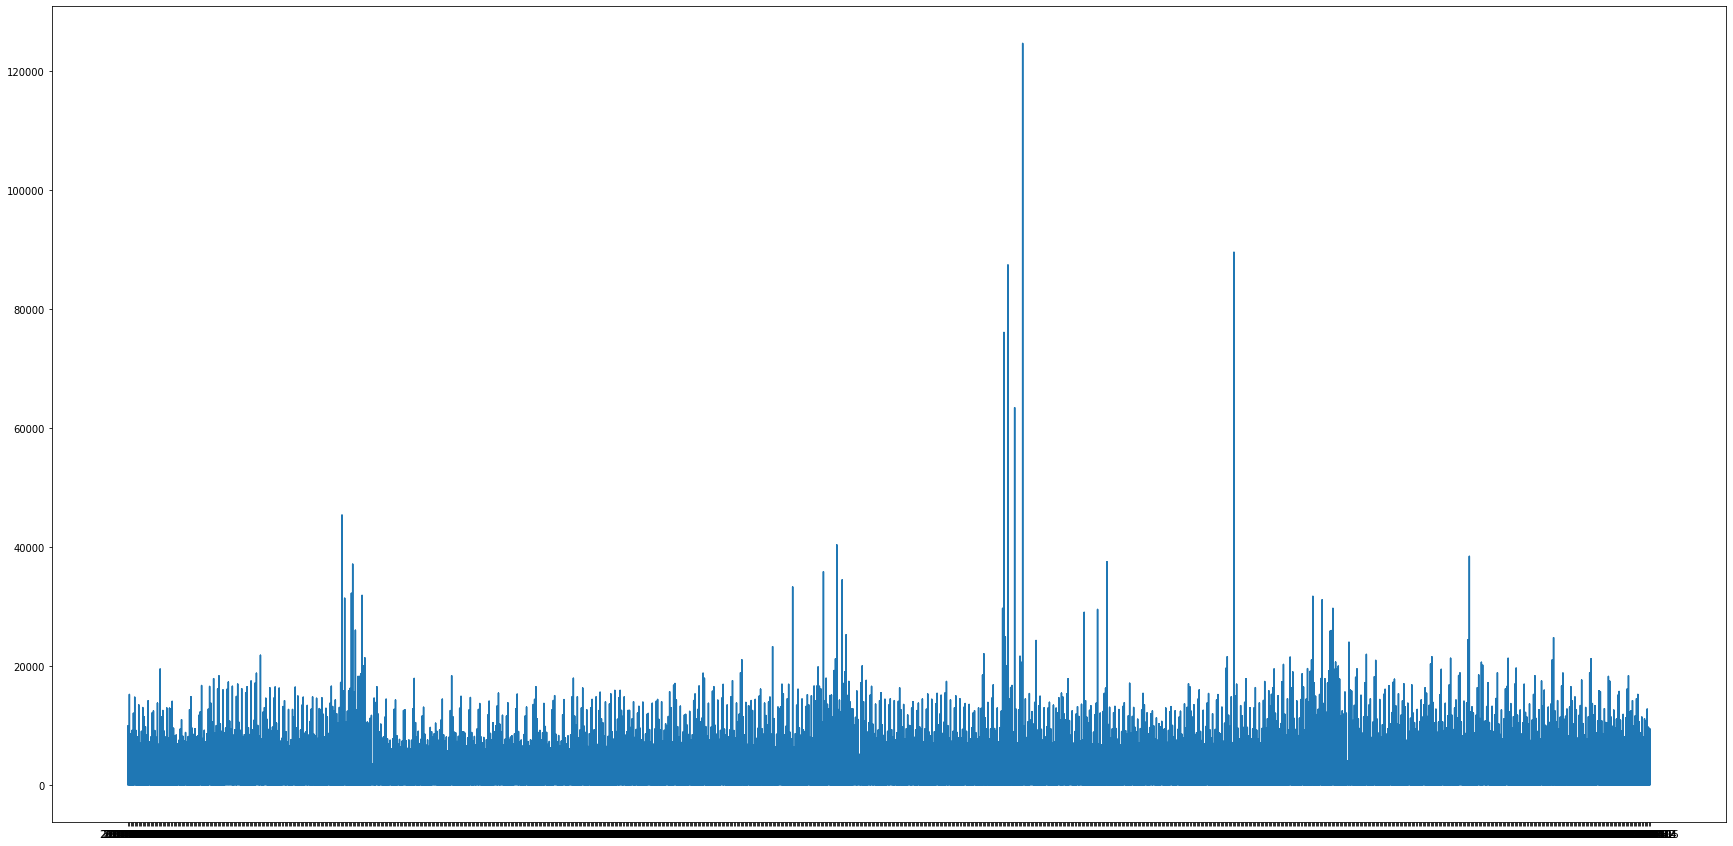

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 15))
plt.plot(train['date'], train['sales'])  

In [32]:
#학습에 필요한 변수만 남기기
train.drop(['id', 'oil_price', 'state', 'type', 'cluster', 'date'], axis=1, inplace=True)
train

,store_nbr,family,sales,onpromotion,city,holiday,wday,year,month
0,1,AUTOMOTIVE,2.000,0,Quito,1,1,2014,7
1,1,BABY CARE,0.000,0,Quito,1,1,2014,7
2,1,BEAUTY,6.000,0,Quito,1,1,2014,7
3,1,BEVERAGES,1868.000,0,Quito,1,1,2014,7
4,1,BOOKS,0.000,0,Quito,1,1,2014,7
...,...,...,...,...,...,...,...,...,...
2029693,9,POULTRY,438.133,0,Quito,1,15,2017,8
2029694,9,PREPARED FOODS,154.553,1,Quito,1,15,2017,8
2029695,9,PRODUCE,2419.729,148,Quito,1,15,2017,8
2029696,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,1,15,2017,8


In [33]:
#범주형 변수 원핫인코딩
train_dum = pd.get_dummies(train, columns = ['store_nbr', 'family', 'city', 'holiday', 'wday', 'year', 'month'])
train_dum

,sales,onpromotion,store_nbr_1,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,store_nbr_7,store_nbr_8,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2.000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,6.000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1868.000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029693,438.133,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2029694,154.553,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2029695,2419.729,148,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2029696,121.000,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [34]:
#테스트 데이터 전처리
test.drop(['id', 'state', 'type', 'cluster', 'date', 'oil_price'], axis=1, inplace=True)
te_x = pd.get_dummies(test, columns = ['store_nbr', 'family', 'city', 'holiday', 'wday', 'year', 'month'])
te_x

,onpromotion,store_nbr_1,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,store_nbr_7,store_nbr_8,store_nbr_9,...,wday_24,wday_25,wday_26,wday_27,wday_28,wday_29,wday_30,wday_31,year_2017,month_8
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,20,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1
28508,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1
28509,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1
28510,9,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1


In [35]:
#cv 객체 생성
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(test_size=26730)

## 다중선형회귀

### train data 학습

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

auc = []

for (trainidx, testidx) in tscv.split(train_dum):
  tr = train_dum.iloc[trainidx, :]
  te = train_dum.iloc[testidx, :]

  tr_x, tr_y = tr.drop(['sales'], axis=1), tr.loc[:, 'sales']
  te_x, te_y = te.drop(['sales'], axis=1), te.loc[:, 'sales']

  lr = LinearRegression().fit(tr_x, tr_y)
  auc.append(lr.score(te_x, te_y))

print('cv 별 정확도: ', auc)

cv 별 정확도:  [0.6308271633297842, 0.6491512022044702, 0.6593779088856346, 0.6877406038569404, 0.7078151742138457]


### test data 예측

In [48]:
lr.predict(te_x)

array([ -64.03125   ,  -69.16015625,  -68.16796875, ..., 3858.2578125 ,
        250.671875  ,  151.15625   ])

## XGBoost

### train data 학습

In [36]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

auc = []

for (trainidx, testidx) in tscv.split(train_dum):
  tr = train_dum.iloc[trainidx, :]
  te = train_dum.iloc[testidx, :]

  tr_x, tr_y = tr.drop(['sales'], axis=1), tr.loc[:, 'sales']
  te_x, te_y = te.drop(['sales'], axis=1), te.loc[:, 'sales']

  xgb = XGBRegressor(n_estimators=10, max_depth=3).fit(tr_x, tr_y)
  y_pred = xgb.predict(te_x)
  auc.append(mean_squared_error(te_y, y_pred))

print('cv 별 mse: ', auc)

[02:11:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:14:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:15:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:16:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:18:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cv 별 정확도:  [1087178.061051329, 838467.8548767901, 948897.8167460018, 749225.4014328202, 682311.6836973786]


### 파라미터 튜닝

In [37]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.5/348.5 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.4/210.4 KB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 KB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 KB 16.6 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=9c19e1d1bcf97804bcd07f151dc8caa1b4b918d60e9120040ec485352825d71e
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip
  

In [42]:
from sklearn.metrics import mean_squared_error

def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'n_estimators': trial.suggest_int('n_estimators', 10, 100)
    }
    model = XGBRegressor(**param)
    model.fit(tr_x, tr_y)
    y_pred = model.predict(te_x)
    
    return mean_squared_error(te_y, y_pred)

In [43]:
# Create the study
import optuna

study = optuna.create_study(direction='minimize', study_name='regression')
study.optimize(objective, n_trials=10)

[I 2023-01-14 02:31:09,050] A new study created in memory with name: regression


[02:31:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2023-01-14 02:34:41,427] Trial 0 finished with value: 372281.11440877826 and parameters: {'max_depth': 3, 'n_estimators': 33}. Best is trial 0 with value: 372281.11440877826.


[02:34:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2023-01-14 02:56:58,955] Trial 1 finished with value: 127059.59891568164 and parameters: {'max_depth': 7, 'n_estimators': 93}. Best is trial 1 with value: 127059.59891568164.


[02:57:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2023-01-14 03:25:55,583] Trial 2 finished with value: 107567.03589267693 and parameters: {'max_depth': 9, 'n_estimators': 91}. Best is trial 2 with value: 107567.03589267693.


[03:25:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2023-01-14 03:29:10,597] Trial 3 finished with value: 319886.021188778 and parameters: {'max_depth': 5, 'n_estimators': 18}. Best is trial 2 with value: 107567.03589267693.


[03:29:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2023-01-14 03:45:13,702] Trial 4 finished with value: 160625.78081624725 and parameters: {'max_depth': 5, 'n_estimators': 97}. Best is trial 2 with value: 107567.03589267693.


[03:45:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[W 2023-01-14 03:47:05,357] Trial 5 failed because of the following error: KeyboardInterrupt()
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-42-4c7b9f52792d>", line 9, in objective
    model.fit(tr_x, tr_y)
  File "/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py", line 391, in fit
    self._Booster = train(params, trainDmatrix,
  File "/usr/local/lib/python3.8/dist-packages/xgboost/training.py", line 212, in train
    return _train_internal(params, dtrain,
  File "/usr/local/lib/python3.8/dist-packages/xgboost/training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "/usr/local/lib/python3.8/dist-packages/xgboost/core.py", line 1108, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle, ctypes.c_int(iteration),
KeyboardInterrupt


KeyboardInterrupt: ignored

In [44]:
print('Best parameters', study.best_params)

print('Best value', study.best_value)

print('Best trial', study.best_trial)

Best parameters {'max_depth': 9, 'n_estimators': 91}
Best value 107567.03589267693
Best trial FrozenTrial(number=2, values=[107567.03589267693], datetime_start=datetime.datetime(2023, 1, 14, 2, 56, 58, 957133), datetime_complete=datetime.datetime(2023, 1, 14, 3, 25, 55, 582941), params={'max_depth': 9, 'n_estimators': 91}, distributions={'max_depth': IntDistribution(high=10, log=False, low=1, step=1), 'n_estimators': IntDistribution(high=100, log=False, low=10, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=2, state=TrialState.COMPLETE, value=None)


In [45]:
model = XGBRegressor(**study.best_params)
model.fit(tr_x, tr_y)
y_pred = model.predict(te_x)

print('MSE: ', mean_squared_error(te_y, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(te_y, y_pred)))

[03:47:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE:  107567.03589267693
RMSE:  327.974139060806


### test data 예측

In [46]:
model.predict(te_x)

array([   9.599123,    9.599123,    8.284686, ..., 2244.3938  ,
        284.9952  ,    8.506462], dtype=float32)